 ### Chapter 11: Introducing Matrix Models 

 Nt+1 = 1.2*Nt + 0*St

 St+1 = 0.2*Nt + 1.4*St

 nt+1 = A * nt

 ### Chapter 12: Imagine All the Beetles : Age-Structured Models

 A ranger at a nearby state park has recently trapped several beetles of a non-native species that had not previously been seen at the park. A study in the beetle’s native range, where the insect is a crop pest, found that the beetles appear to live up to three years in the wild. First-year beetles have a 30% chance of surviving into their second year, and second-year beetles have a 50% chance of surviving into their third year. Second-year females produce 2 surviving offspring on average, and third-year females produce 10 surviving offspring on average. The ranger fears that there could be as many as a thousand first- and second-year individuals currently in the park. How many beetles could be present in the park in 20 years if no control actions are taken? How much would it help to set traps that catch 5% of the second- and third-year adults that would have otherwise survived each year?

  * 3 years in wild
  * F = first year
  * S = second year 
    * produce 2 surviving offspring 
  * T = third year 
    * produce 10 surviving offspring

Before we can get started, however, we need to consider a complication that we have not encountered in any of our previous population models. It’s not stated in the problem, but it’s probably safe to assume that this beetle species reproduces sexually, which means that there are male and female beetles in the population. Male beetles, however, cannot give birth to offspring. To address this complication, a simple approach is to assume that half of the population consists of males and half consists of females at all time periods. With this assumption, we can see that while the average number of offspring produced by a second-year female is 2, the average number produced by a second-year individual is 1, since half of the second-year individuals do not produce offspring. Similarly, the average number of offspring per third-year individual is 5, instead of 10.

Ft+1 = 1St + 5 Tt
St+1 = 0.3 * Ft
Tt+1 = 0.5 * St

vector idk how to type out 

        (1   5   0)           (St)  
A =    (0   0   0.3)    nt = (Tt)
        (0.5 0   0)           (Ft)

In [1]:
import numpy as np


In [2]:
#create an algoritm that calculates the population of 3 ages of a beetle population and the total population over 50 years
 # the initial first year population is 500 and the the initial second year population is 500
 # on average 1 beetle produces 1 offspring in the second years and 5 offspring in the third year
 # the first year beetles survive 30% to second year and 50% of second year beetles survive to third year

# create a definition to calculate and return the population of each age group and the total population for each year 
def beetle_population(years, initial_first_year, initial_second_year):
    # set explanation of parameters
    """
    Parameters:
    years: int, number of years to calculate the population for
    initial_first_year: int, initial population of first year beetles
    initial_second_year: int, initial population of second year beetles
    
    Returns:
    first_year_population: list, population of first year beetles for each year
    second_year_population: list, population of second year beetles for each year
    third_year_population: list, population of third year beetles for each year
    total_population: list, total population for each year

    """
    # complete the alogorithm using matrix multiplication
    # create a matrix to represent the transition of beetle populations between years
    A = np.array([[0, 1, 5], [0.3, 0, 0], [0, 0.5, 0]])
    # initialize the population vector with the initial populations
    initial_population_vector = np.array([initial_first_year, initial_second_year, 0])
    # create a list to store the total population for each year
    first_year_population = []
    second_year_population = []
    third_year_population = []
    total_population = []
    # append the initial populations to the lists
    first_year_population.append(initial_population_vector[0])
    second_year_population.append(initial_population_vector[1])
    third_year_population.append(initial_population_vector[2])
    total_population.append(sum(initial_population_vector))
    # loop through each year to calculate the population
    n_t = initial_population_vector
    for years in range(years):
        # calculate the population for the next year using matrix multiplication
        n_t = np.dot(A, n_t)
        first_year_population.append(n_t[0])
        second_year_population.append(n_t[1])
        third_year_population.append(n_t[2])
        total_population.append(sum(n_t))
    return first_year_population, second_year_population, third_year_population, total_population

In [3]:
# call the function with 150 years, 500 initial first year beetles, and 500 initial second year beetles
first_year_population, second_year_population, third_year_population, total_population = beetle_population(150, 500, 500)


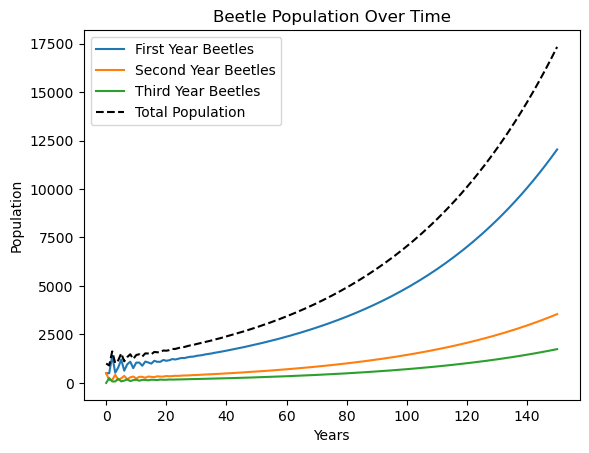

In [4]:
# plot the population of each age group and the total population over time
import matplotlib.pyplot as plt
plt.plot(first_year_population, label='First Year Beetles')
plt.plot(second_year_population, label='Second Year Beetles')
plt.plot(third_year_population, label='Third Year Beetles')
plt.plot(total_population, label='Total Population', linestyle='--', color='black')
plt.xlabel('Years')
plt.ylabel('Population')
plt.title('Beetle Population Over Time')
plt.legend()
plt.show()


### How many beetles could be present in the park in 20 years if no control actions are taken?
 - There were around 2,500 (there was less, but I rounded) beetles after 20 years, but the population was still increasing rapidly.

In [5]:
#create an algoritm that calculates the population of 3 ages of a beetle population and the total population over 150 years
 # the initial first year population is 500 and the the initial second year population is 500
 # on average 1 beetle produces 1 offspring in the second years and 5 offspring in the third year
 # the first year beetles survive 30% to second year and 50% of second year beetles survive to third year
 # traps were set up that catch 5% of all second and third year beetles each year

# create a definition to calculate and return the population of each age group and the total population for each year 
def beetle_population_withtrap(years, initial_first_year, initial_second_year):
    # set explanation of parameters
    """
    Parameters:
    years: int, number of years to calculate the population for
    initial_first_year: int, initial population of first year beetles
    initial_second_year: int, initial population of second year beetles
    
    Returns:
    first_year_population: list, population of first year beetles for each year
    second_year_population: list, population of second year beetles for each year
    third_year_population: list, population of third year beetles for each year
    total_population: list, total population for each year

    """
    # complete the alogorithm using matrix multiplication
    # create a matrix to represent the transition of beetle populations between years
    # Adjust survival rates to account for 5% being caught in traps
    trap_rate = 0.05
    A = np.array([[0, 1, 5], 
                  [0.3, 0, 0],
                  [0, 0.5, 0]]) * (1 - trap_rate)
    # initialize the population vector with the initial populations
    initial_population_vector = np.array([initial_first_year, initial_second_year, 0])
    # create a list to store the total population for each year
    first_year_population = []
    second_year_population = []
    third_year_population = []
    total_population = []
    # append the initial populations to the lists
    first_year_population.append(initial_population_vector[0])
    second_year_population.append(initial_population_vector[1])
    third_year_population.append(initial_population_vector[2])
    total_population.append(sum(initial_population_vector))
    # loop through each year to calculate the population
    n_t = initial_population_vector
    for year in range(years):
        # calculate the population for the next year using matrix multiplication
        n_t = np.dot(A, n_t)
        first_year_population.append(n_t[0])
        second_year_population.append(n_t[1])
        third_year_population.append(n_t[2])
        total_population.append(sum(n_t))
    return first_year_population, second_year_population, third_year_population, total_population

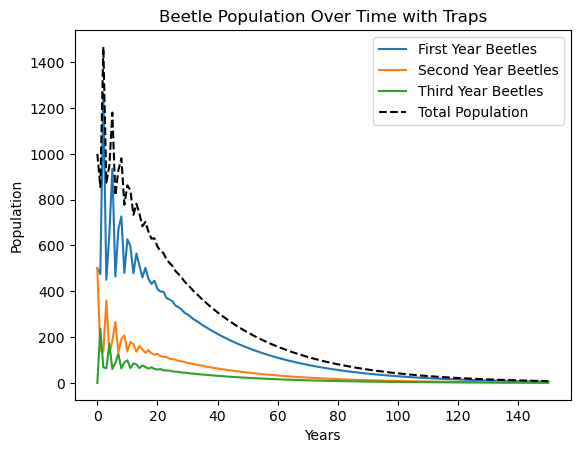

In [6]:
# call the function with 150 years, 500 initial first year beetles, and 500 initial second year beetles
first_year_population, second_year_population, third_year_population, total_population = beetle_population_withtrap(150, 500, 500)
# plot the population of each age group and the total population over time
plt.plot(first_year_population, label='First Year Beetles')
plt.plot(second_year_population, label='Second Year Beetles')
plt.plot(third_year_population, label='Third Year Beetles')
plt.plot(total_population, label='Total Population', linestyle='--', color='black')
plt.xlabel('Years')
plt.ylabel('Population')
plt.title('Beetle Population Over Time with Traps')
plt.legend()

### How much would it help to set traps that catch 5% of the second- and third-year adults that would have otherwise survived each year?
 - Setting traps showed dramatic fluctuations in population, and lead to a much lower population overall. The population would die out after around 80 years, with a max population of around 1,400 beetles.
